In [1]:
import os
import sys
import matplotlib.pyplot as plt
import time

sys.path.append('..')
from dataloading import data_loading, preprocessing

import torch
from torch.utils.data import DataLoader
from torchvision import transforms

In [2]:
tfs = transforms.Compose([
    preprocessing.NormalizeImage(),
])

ds_train, ds_val = data_loading.get_datasets(
    '/scratch/phys/project/sin/hackathon/data/afm.h5',
    train_transform=tfs,
    val_transform=tfs,
    train_size=0.8,
)

In [9]:
s = ds_train[1]
for k in s:
    print(f"k: {k}, shape: {len(s[k]) if hasattr(s[k], '__len__') else s[k].shape}")
    
print(s['nodes'])
print(s['edges'])

k: x, shape: 1
k: nodes, shape: 28
k: edges, shape: 30
[[ 6.2319994e-01  3.9120102e-01  4.5333058e-01 -1.6295999e-01
   4.0000000e+00]
 [ 4.9442506e-01  5.1583242e-01  5.0518018e-01 -2.5634000e-01
   3.0000000e+00]
 [ 5.1011431e-01  4.1906637e-01  4.9314854e-01 -2.3490000e-01
   2.0000000e+00]
 [ 2.9521209e-01  5.9043860e-01  5.7726204e-01 -1.2060000e-02
   1.0000000e+00]
 [ 7.0592475e-01  5.2683973e-01  4.3490338e-01  3.6500001e-03
   1.0000000e+00]
 [ 3.4809357e-01  6.1817616e-01  5.6148100e-01  2.8599999e-03
   1.0000000e+00]
 [ 2.9111534e-01  5.2879828e-01  5.7430589e-01  3.7000000e-03
   1.0000000e+00]
 [ 6.9155729e-01  4.6685708e-01  4.3560031e-01 -2.6030000e-02
   1.0000000e+00]
 [ 3.9652041e-01  5.8484495e-01  5.4291034e-01  2.1310000e-02
   1.0000000e+00]
 [ 3.3929780e-01  4.9524480e-01  5.5580389e-01 -1.2160000e-02
   1.0000000e+00]
 [ 6.6377950e-01  5.6872666e-01  4.5194632e-01  1.3800000e-03
   1.0000000e+00]
 [ 6.3537169e-01  4.4925094e-01  4.5326987e-01  2.2484000e-01
   

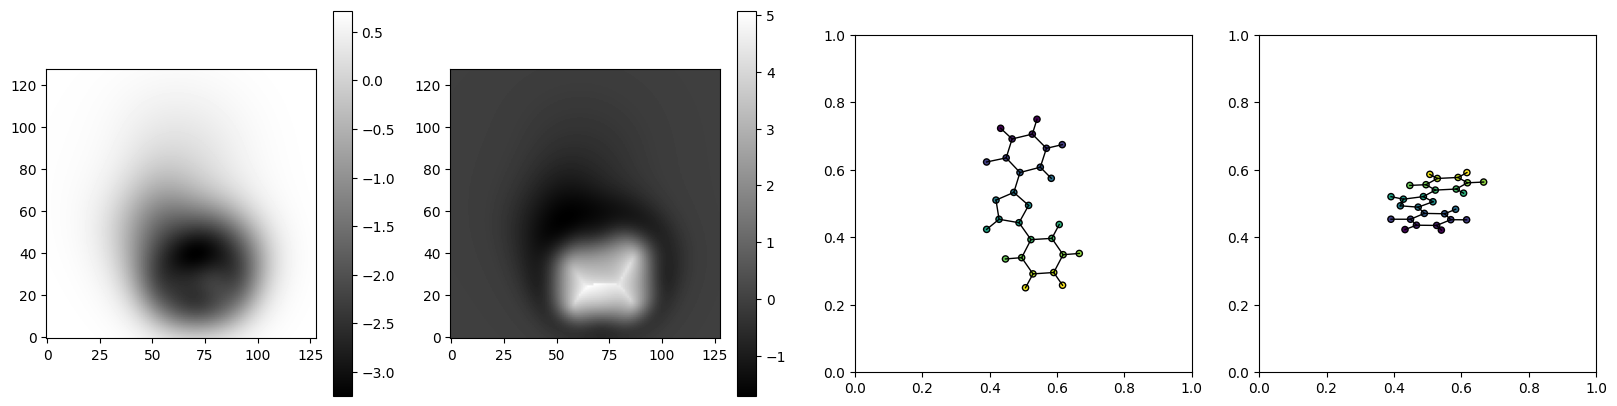

In [14]:
fig = plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 4, 1)
im = ax.imshow(s['x'][0, ..., 0], cmap='gray', origin='lower')
plt.colorbar(im)

ax = plt.subplot(1, 4, 2)
im = ax.imshow(s['x'][0, ..., -1], cmap='gray', origin='lower')
plt.colorbar(im)

ax = plt.subplot(1, 4, 3)
for e in s['edges']:
    ax.plot(s['nodes'][e, 1], s['nodes'][e, 0], 'k-', lw=1)

ax.scatter(s['nodes'][:, 1], s['nodes'][:, 0], c=s['nodes'][:, 2], s=20, edgecolors='k', cmap='viridis')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')

# plot node positions in side view
ax = plt.subplot(1, 4, 4)
ax.scatter(s['nodes'][:, 1], s['nodes'][:, 2], c=s['nodes'][:, 2], s=20, edgecolors='k', cmap='viridis')

for e in s['edges']:
    ax.plot(s['nodes'][e, 1], s['nodes'][e, 2], 'k-', lw=1)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')



In [5]:
def afm_collate_fn(batch):
    images = torch.stack([torch.from_numpy(item['x']) for item in batch])
    points = [torch.from_numpy(item['nodes']) for item in batch]
    edges = [torch.from_numpy(item['edges']) for item in batch]
    #points = [item_ for item in batch for item_ in item[2]]
    #edges = [item_ for item in batch for item_ in item[3]]
    return [images, points, edges]


In [8]:
dl = DataLoader(ds_train, batch_size=8, collate_fn=afm_collate_fn)
dl = iter(dl)
for i in range(10):
    t0 = time.time()
    batch = next(dl)
    print(f"images: {batch[0].shape}, points: {len(batch[1])} - {batch[1][0].shape}, edges: {len(batch[2])} - {batch[2][0].shape}")
    print(f"Time: {time.time() - t0}")
    time.sleep(0.1)

images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([28, 5]), edges: 8 - torch.Size([30, 2])
Time: 2.282468318939209
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([28, 5]), edges: 8 - torch.Size([29, 2])
Time: 2.5012733936309814
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([28, 5]), edges: 8 - torch.Size([29, 2])
Time: 2.101328134536743
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([36, 5]), edges: 8 - torch.Size([37, 2])
Time: 2.309398889541626
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([30, 5]), edges: 8 - torch.Size([31, 2])
Time: 2.101194143295288
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([37, 5]), edges: 8 - torch.Size([36, 2])
Time: 2.099842071533203
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([31, 5]), edges: 8 - torch.Size([32, 2])
Time: 2.4983108043670654
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([34, 5]), edges: 8 - to